Mohammed Farouk Kooli, Wael farhat Group 10

# Olist E-commerce Customer Segmentation using k-means

## 1. Business Understanding
With the substantial growth of Olist in the competitive E-commerce landscape, the need to identify its users has become vital to keep up with its competitors.
To keep up with its rising trajectory and assisting its users to find their needs, Olist needs to determine its users preferences, behaviour and pattern based on its collected data to be able to provide personalized product recommendations.

### 1.1 Project description
Olist has a diverse customer base with varying preferences, behaviors, and needs. The company currently lacks a granular understanding of its customer segments, making it difficult to tailor marketing efforts, product recommendations, and customer service to individual customer needs. As a result, Olist faces several operational and marketing challenges.
By addressing this business problem through improved customer segmentation, Olist can enhance its competitive position and provide a superior shopping experience to its customers, ultimately driving higher revenue and profitability in the Brazilian e-commerce market.

### 1.2 Project objectives
Customer Segmentation: Implement advanced clustering algorithms to categorize Olist's customers into distinct segments based on their purchasing behavior, preferences, and demographic data.
Personalized Recommendations: Utilize the results of clustering to develop personalized product recommendations for customers within each segment, ultimately increasing user engagement and satisfaction.

## 2. Data Understanding

### 2.1. Importing the data
To be able to interpret the data we need to first understand it by knowing its type (nominal or ordinal) and identify its 
The following Olist data was provided from <a href='https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce'>kaggle.com</a>
which is a popular online platform for data science competitions, machine learning projects, and data analytics.
We will also have to import pandas library because it simplifies work done on dataframe.
The following code is an example of importing a dataset.

In [3]:

import pandas as pd

# df = pd.read_csv("PATH.csv")
PATH='C:\\Users\\Wael7\\Data Analytics Course\\Data\\customers.csv'#change file here to import
df = pd.read_csv(PATH)
df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### 2.2. Data exploration
Olist has provided 9 Datasets publicly to be analysed and conclude ways to improve its targeted user recommendation.
Each dataset will be briefly discussed.
#### Customers Dataset
this dataset contains information about the customers such as orders, location and zip code which will help us classify users based on location.
#### Geolocation Datalist
The geolocation dataset contains the location of Olist users with latitude and logitutde values. This may cause security concerns, however Olist has already taken into account users' safety and removed the total user zipcode and added only kept a prefix.
#### Order Items Datalist
This datalist contains details of orders users and the prices of the order
and can be traced to its user using order_id.
#### Order Payment Datalist
Order payments contains details of how orders are paid and the method of payment.
#### Order Reviews Datalist
The order reviews datalist contains comments and ratings given by users and the date of review.
#### Order Datalist
Contains general information on the order such as date of request and the items
#### Products Datalist
Products datalist delivers information on the products datalist such as weight,size and its category
#### Sellers Datalist
The sellers datalist provide information on the sellers of the products
#### Category Name Translation Datalist
Because Olist is a brazilian e-commerce company, it provides its category details in brazilian, however, Olist has provided a translation for all its categories in this datalist.</br>

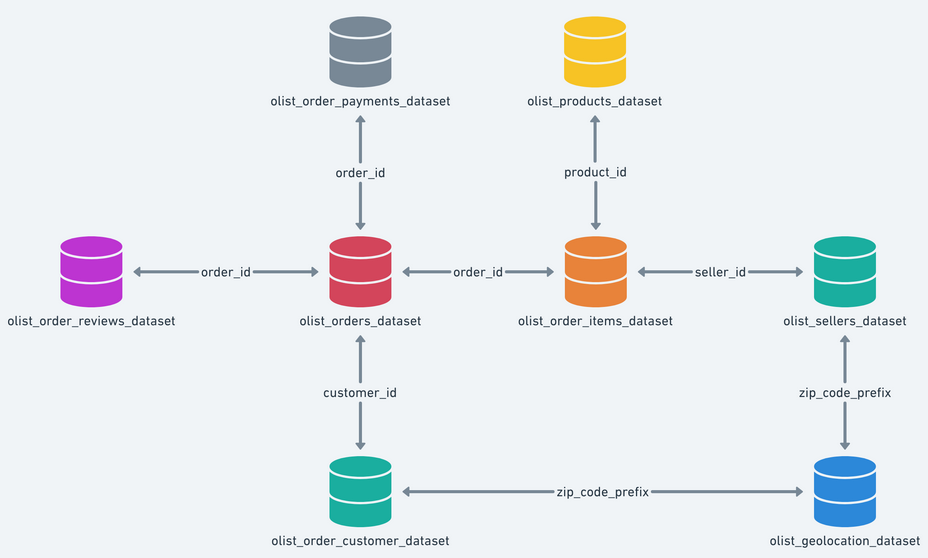

<div style='color:red'>the previous image is a Data schema provided by olist to better understand the relations of each dataset</div>


### 2.2.1 Columns description
In this section, we will discuss the most significant feature of datasets given by Olist.
Please note that there are 52 existing columns which is why we won't include all of the columns in this report, however, all of the columns are well explained in the Data Understanding lab.

#### Customers Dataset
customer_id: is a key to the orders dataset, each order creates a customer id.

customer_unique_id: is the identifier for each customer, for each customer there exists only one unique id.

customer_zip_code_prefix:Contains details on the customer zip code prefix (first 5 numbers of zip code).

Customer state: contains the state that the user lives in, this column is limited to only brazil states because Olist currently works only in brazil.

#### Geolocation Dataset
geolocation_lat and geolocation_lng: these columns contain the latitude and longitude of users.

#### Order Items Dataset
order_id: is the Unique id for the order.

order_item_id: is the number of items requested in an order.

price: contains price of the item.

freight_value:contains the fees of delivery
.
#### Order Payments Datalist
payment_sequential: a variable that enumerates number of methods made for a payment of an order(ex using 10 coupons creates 10 instances.).

payment_type: Contains method of payment

payment_installments: number of installments requested by customer

#### Order Reviews Datalist
review_id: Unique identifier of review

review_score: score given by user

review_comment_message:contains feedback of user as text

#### Order Datalist
order_id:unique identifier for order.

order_Status:Contains status of order.

order_approved_at: is the timestamp of approval made by the seller.

#### Products Datalist
product_id: Unique identifier of a product.
product_category_name: contains category name of the product.
product_length_cm, product_height_cm, product_width_cm: Contains dimensions of a product.

#### Sellers Datalist
Sellers_id: contains unique id of sellers.

seller_state: location of seller in state.

#### Category name translation
product_category_name: contains category name in brazilian.

product_category_name_english: contains category name in english.



## 3. Data preparation and pre-processing

### 3.1. Data cleaning 
Fortunately, Olist has verified its data so that No entry is empty or null, however, the data requires a lot of reduction because we won't be using all of the 9 datasets nor every column.
The merging steps of dataframes is a lengthy process which is done in Data preprocessing and Feature engineering Lab, please refer to them.
There exists duplicates rows in data which will be dropped in order to prevent inaccurate results.

In [7]:
import pandas as pd
import numpy as np

#place the location in the path var
path='C:\\Users\\Wael7\\Data Analytics Course\\Data\\orderItems.csv'
#loading the file on df
df = pd.read_csv(path)
#dropping order_item_id as its only use is displaying number of items ordered (unique and same order)
df=df.drop(['seller_id','shipping_limit_date','order_item_id'],axis=1)
df=df.drop_duplicates(subset=['order_id'])
path='C:\\Users\\Wael7\\Data Analytics Course\\Data\\orders.csv'
orderDf = pd.read_csv(path)#using this to remove duplicates of the same produuct
orderDf = orderDf.loc[:, ['customer_id','order_id']]# removing all columns except order_id and product_id
df = pd.merge(df, orderDf, on='order_id')
path='C:\\Users\\Wael7\\Data Analytics Course\\Data\\customers.csv'
customerDf = pd.read_csv(path)
merged_df = pd.merge(df, customerDf, on='customer_id', suffixes=('', '_customer'))
merged_df.to_csv('rawDF.csv',index=False)
df.head(1)

,order_id,product_id,price,freight_value,customer_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a


One of the methods that would assist us in identifying user behaviour is possible by determining the most categories bought in states 

In [5]:
merged_df=merged_df[['product_id','customer_state']]

### 3.2. Data visualization

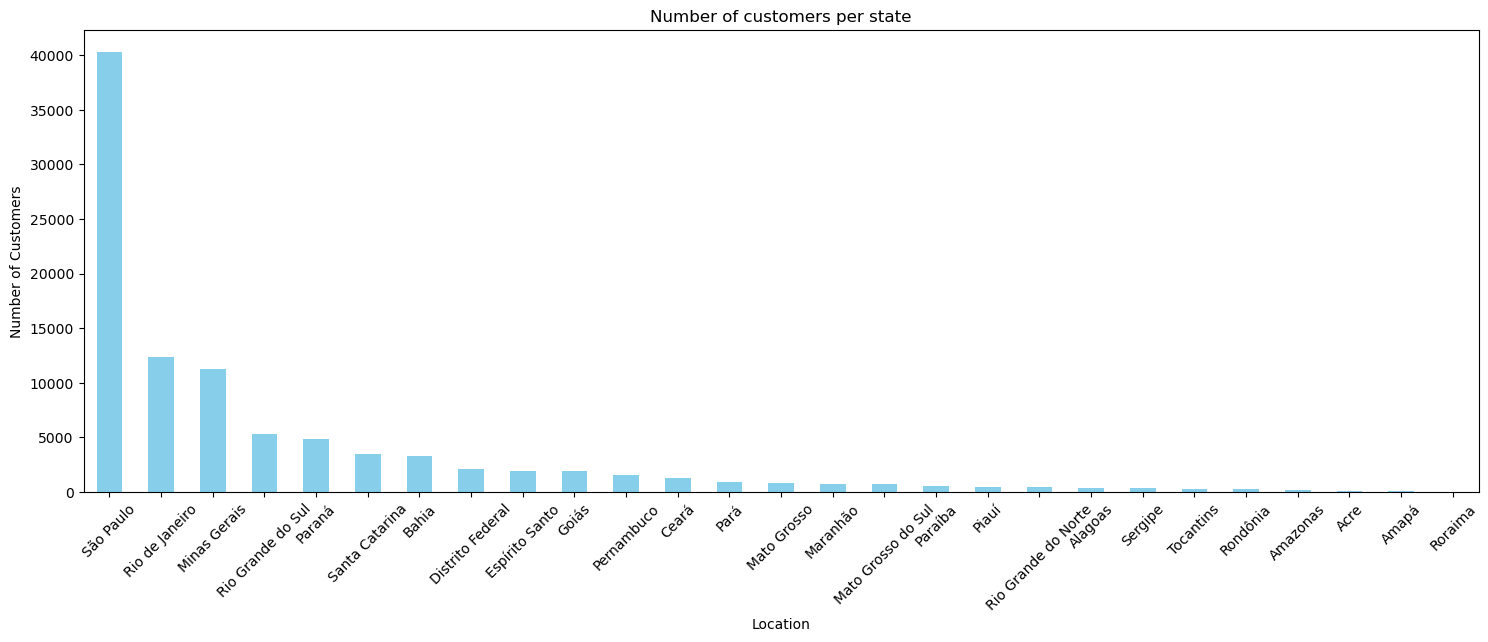
The graph above shows the number of customers per state.
There exists a drastic difference in sao paulo when compared to other states reaching almost 40 000 customers, second and third are rio de janeiro and Minas Gerais respectiverly with approximately 13 000 users.




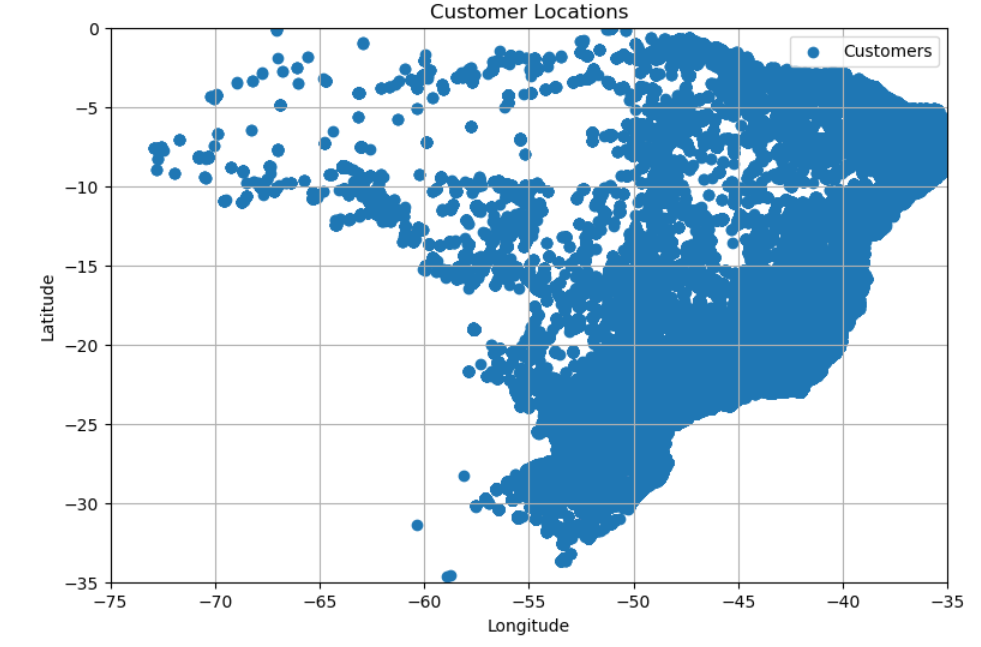
This graph utilized the columns in geolocation dataset to pinpoint the locations of Olist's users.
The map has an identical shape of brazil.


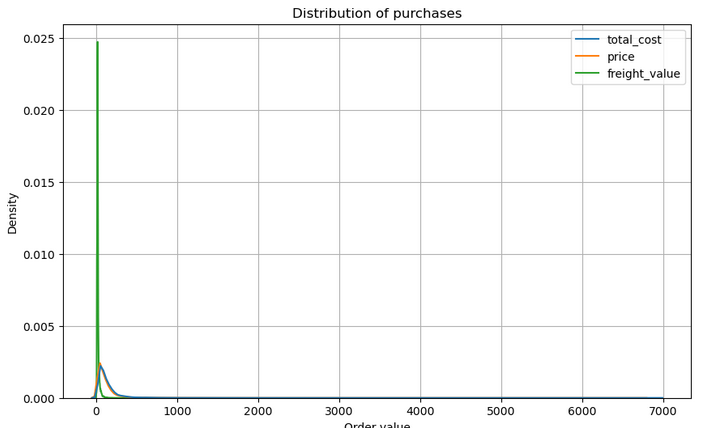
This graph shows the distribution of all purchases made in olist
The graph looks distorted due to the outliers of an order value 8000
to fix this we will remove the top 5% quantile to improve data visualization.

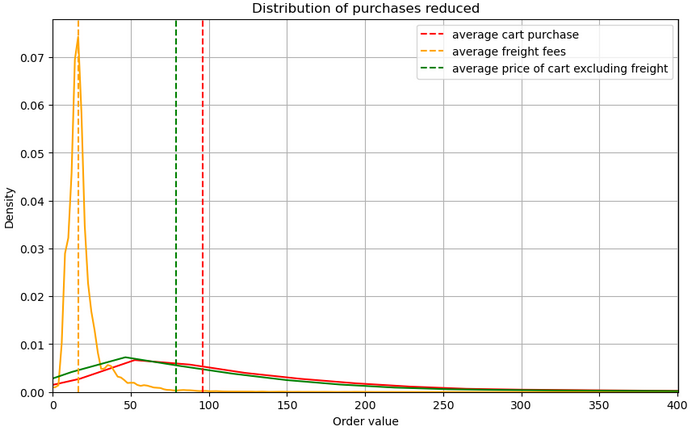
The graph has been fixed and now we can clearly differentiate between the lines.
the dashed lines represents the mean/average of the cost of the order.
the orange dashed line represents the cost of the item excluding the freight value.
we can see that the average of a cart purchase is around 100 (the website did not specify which currency) including freight fees.

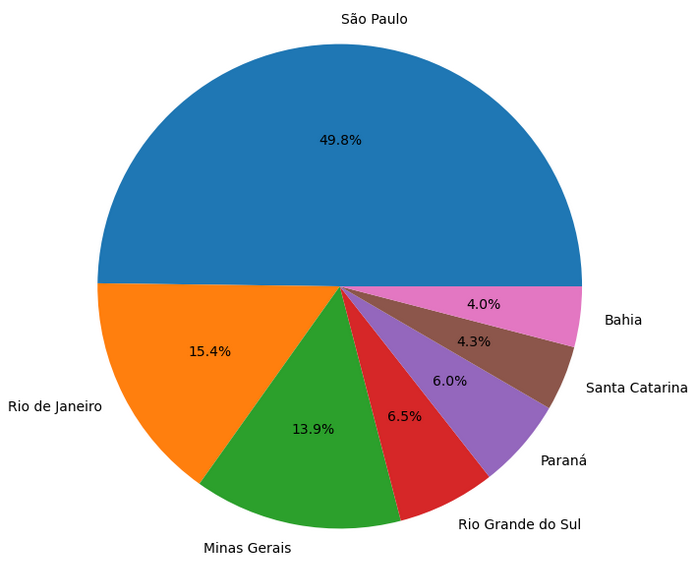
this pie displays the top 7 states with the most purchases made
We can view a substantial difference of sao paulo with 50% of sales made.
The great difference could be because of the higher population of sao paulo and its advancement of E-commerce when compared to other states.

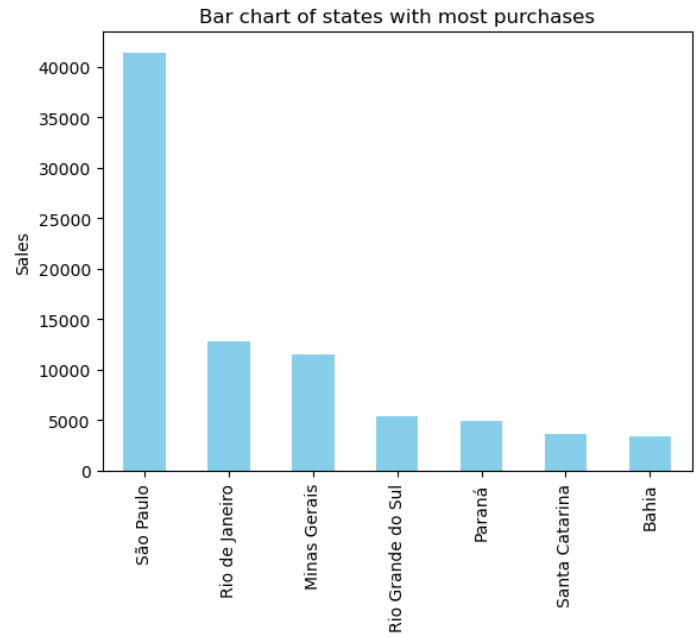
This bar chart is a numerical representation of sales instead of percentages

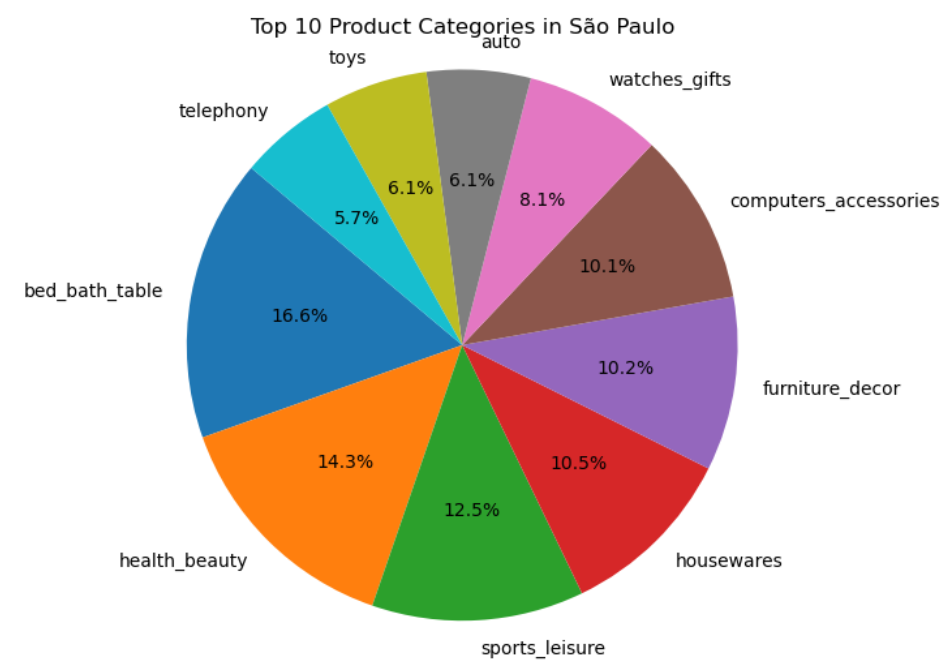

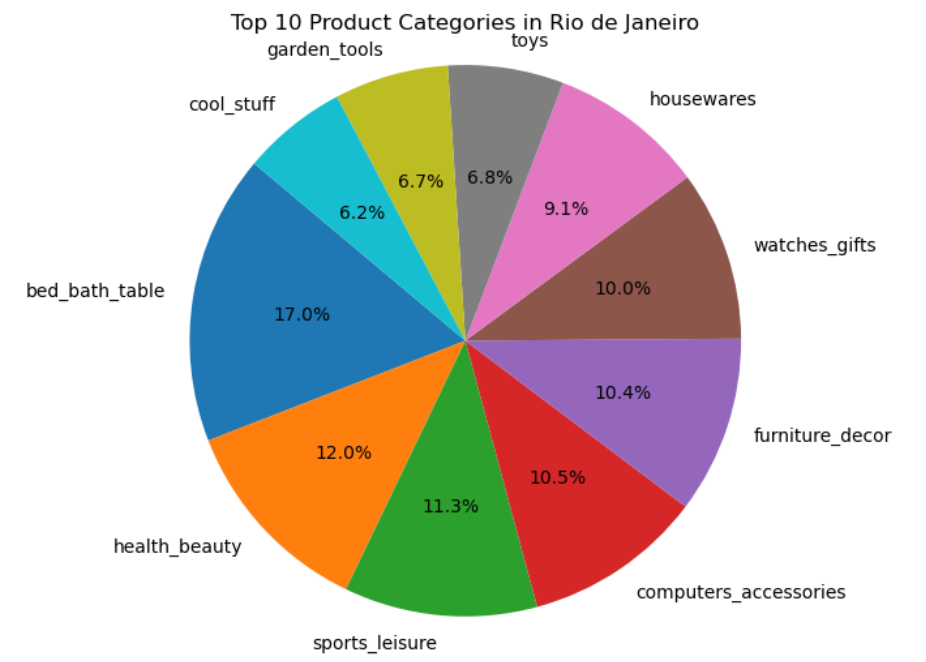

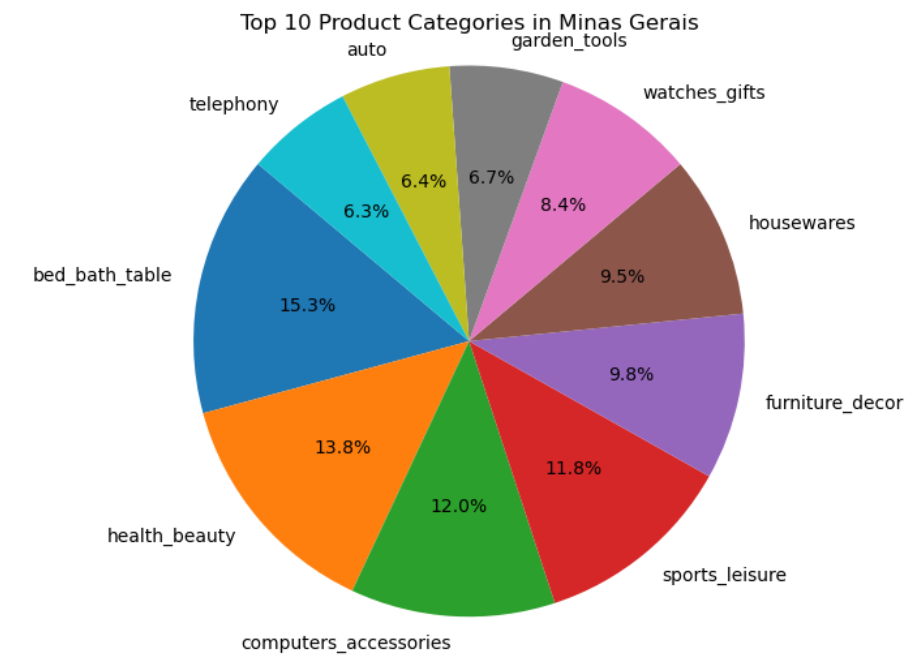

The previous pie charts display that Olist is not known for just one category but has diverse categories that users are insterested in.
However, we can view that most of the categories have the same percentages in these top 3 states.
Please refer to the other reports in order to view the code of plotting the graphs.

### 3.3 Data reduction
Working with nearly 52 Columns is very inefficient which is why we discarded some datasets, for example, the product dataset is discarded because we dont have a name for the product to be able to identify it which limits our use of that dataset.
the sellers dataset also has low effect on user behavior because it only provides the sellers' location.
Using comments of users or their ratings is out of scope of this project as we would need to implement NLP to be able to utilize text feedback which is why Olist order reviews dataset is discarded.
While printing our graphs, we had to take into account duplicate rows that will give incorrect graphs.


### 3.4 Data transformation
The names of states stored were stored in portuguese are translated into english using a dictionary.
Olist's category names are stored in portuguese, however,  they had provided translation of categories to english Using Product_category_name_translation dataset, which helped us achieve into plotting these pie charts and making it readable in english.
To calculate the cost of an order we had to create a new column 'total_Cost' which is the sum of freight value and price.

### 3.4. Feature selection

## 4. Modeling

## 5. Evaluation

## 6. Insights, Conclusions and Business recommendations

## 7. Deployment